In [2]:
import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# check pytorch version
torch.__version__

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


'2.2.1+cu121'

# 1. Data prepare and load


Let's create some know data using the linear regression formula.


In [17]:
# create "know " parameters


weight = 7
bias = 4


#create

start =  0

end = 3

step =  0.025


X = torch.arange(start=start,end=end,step=step).unsqueeze(dim=1) # reshape X into dimension (n,1)
y = weight*X +bias + torch.randn(X.shape)

In [18]:
print(f"X shape:{X.shape}")
print(f"y shape:{y.shape}")

X shape:torch.Size([120, 1])
y shape:torch.Size([120, 1])


In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=True,random_state=42)

print(f"X_train shape:{X_train.shape}")
print(f"y_train shape:{y_train.shape}")

print(f"X_test shape:{X_test.shape}")
print(f"y_test shape:{y_test.shape}")

X_train shape:torch.Size([96, 1])
y_train shape:torch.Size([96, 1])
X_test shape:torch.Size([24, 1])
y_test shape:torch.Size([24, 1])


In [54]:
def plot_prediction(train_data = X_train,
                    test_data = X_test,
                    train_label = y_train,
                    test_label = y_test,
                    prediction = None):
    
    '''Plot the train_data, test_data and compare  the prediction'''



    plt.figure(figsize=(14,8))

    # train plot
    plt.scatter(train_data,train_label,c = 'b',s=10,label = "train_data")

    # test plot
    plt.scatter(test_data,test_label,c = 'g',s=10,label = "test_data")

    if prediction is not None :
        plt.scatter(test_data,prediction,c= 'r',s= 10,label = "prediction")


    plt.legend(prop = {"size":14})

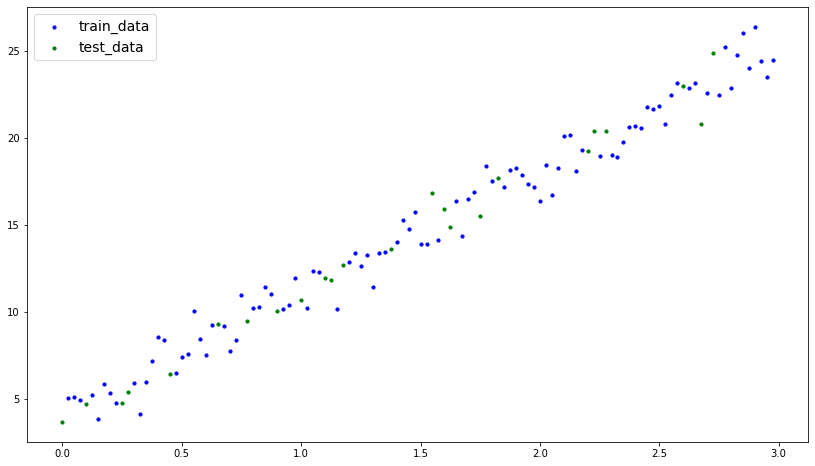

In [55]:
plot_prediction()

# 2. buid a model

In [56]:
# Create a linear model class
class LinearRegressionModel(nn.Module):
    def __init__(self,d = X_train.shape[1]):
        super().__init__()

        self.weight = nn.Parameter(torch.randn(d,requires_grad=True,dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(d,requires_grad=True,dtype=torch.float))


    def forward(self,x):

        return self.weight*x +self.bias


In [106]:
torch.manual_seed(42)
model_0 = LinearRegressionModel()

In [107]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [108]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [109]:
# make preciction without training
with torch.inference_mode():
    y_pred = model_0(X_test)


y_pred[:5]

tensor([[0.4992],
        [0.5244],
        [0.1625],
        [0.5918],
        [0.3477]])

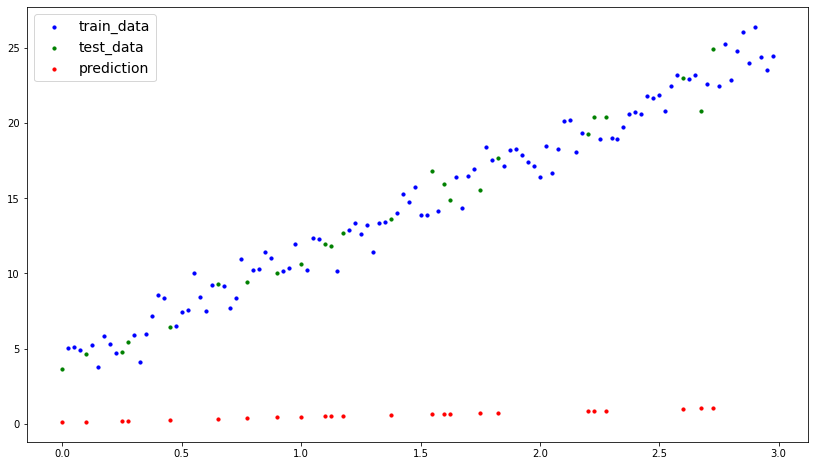

In [110]:
#plot

plot_prediction(prediction=y_pred)

# 3.training

In [111]:
loss_fn = nn.MSELoss()

optimizer = torch.optim.SGD(model_0.parameters(),lr=0.01)

In [112]:
def train_eval(model,
               loss_fn = loss_fn,
               optimizer = optimizer,
               X_train = X_train,
               X_test = X_test,
               y_train = y_train,
               y_test = y_test,
               epochs= 200):

    epoch_count = []
    loss_values = []
    test_loss_values = []

    for epoch in range(epochs):
        model_0.train()

        # 1. forward

        y_pred = model_0(X_train)

        # 2. Calculate the loss

        loss = loss_fn(y_pred,y_train)

        # if epoch%10 ==0:
        #     print(f"Epoch :{epoch+1} ==> loss: {loss}")

        #3. Optimizer zero grad
        optimizer.zero_grad()
        # 4. Perform backpropagation on the loss with respect to the parameters of the model
        loss.backward()
        # 5. step the optimizer (perform gradient descent)
        optimizer.step() # by default how the optimizer changes will acculumate through the loop so...we have to zero 

        # Testing
        model.eval() #turn off gradient tracking (turns off different settings in the model not needed for evaluation/tes
        with torch.inference_mode(): # turns off gradient tracking & a couple more things behind the scenes
            # with torch.no_grad(): # you may also see torch.no_grad() in older PyTorch code
            # 1. Do the forward pass
            test_pred_new = model_0(X_test)
            # 2. Calculate the loss
            test_loss = loss_fn(test_pred_new, y_test)
            # Print out what's happening
            if epoch % 10 == 0:
                epoch_count.append(epoch)
                loss_values.append(loss)
                test_loss_values.append(test_loss)
                print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")
                # print out model state_dict
                print(model_0.state_dict())

    return loss_values , test_loss_values,epoch_count


In [113]:
loss_train,loss_test,epoch_count =train_eval(model=model_0)

Epoch: 0 | Loss: 235.61109924316406 | Test loss: 170.3186492919922
OrderedDict([('weight', tensor([0.8703])), ('bias', tensor([0.4123]))])
Epoch: 10 | Loss: 47.42538070678711 | Test loss: 34.8744010925293
OrderedDict([('weight', tensor([4.3784])), ('bias', tensor([2.2831]))])
Epoch: 20 | Loss: 10.170634269714355 | Test loss: 7.715972900390625
OrderedDict([('weight', tensor([5.9347])), ('bias', tensor([3.1239]))])
Epoch: 30 | Loss: 2.7935619354248047 | Test loss: 2.1883468627929688
OrderedDict([('weight', tensor([6.6229])), ('bias', tensor([3.5062]))])
Epoch: 40 | Loss: 1.331089973449707 | Test loss: 1.0281349420547485
OrderedDict([('weight', tensor([6.9249])), ('bias', tensor([3.6841]))])
Epoch: 50 | Loss: 1.0395984649658203 | Test loss: 0.7699572443962097
OrderedDict([('weight', tensor([7.0554])), ('bias', tensor([3.7708]))])
Epoch: 60 | Loss: 0.9800595641136169 | Test loss: 0.706797182559967
OrderedDict([('weight', tensor([7.1096])), ('bias', tensor([3.8166]))])
Epoch: 70 | Loss: 0.9

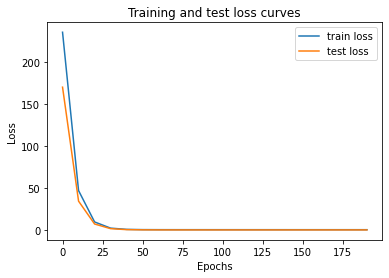

In [114]:
# plot the loss curves
import numpy as np
plt.plot(epoch_count, np.array(torch.tensor(loss_train).numpy()), label="train loss")
plt.plot(epoch_count, loss_test, label="test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [115]:
# plot after training
# make preciction without training
with torch.inference_mode():
    y_pred_new = model_0(X_test)


y_pred_new[:5]

tensor([[11.7765],
        [12.3078],
        [ 4.6924],
        [13.7246],
        [ 8.5887]])

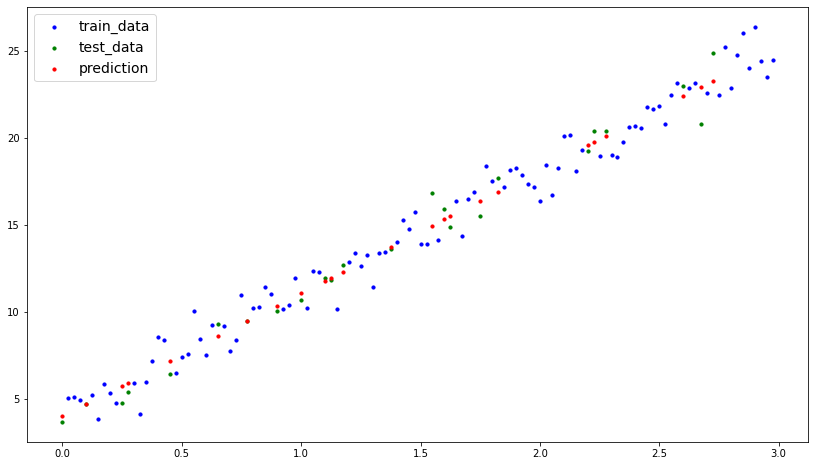

In [116]:
#plot
plot_prediction(prediction=y_pred_new)